
Chat Analysis Options:
1. Word clouds for all users individually
2. Common word cloud for all users
3. Word cloud for '.'
4. Word cloud for 'Devraj Sah'

Generating word cloud for 'Devraj Sah'...


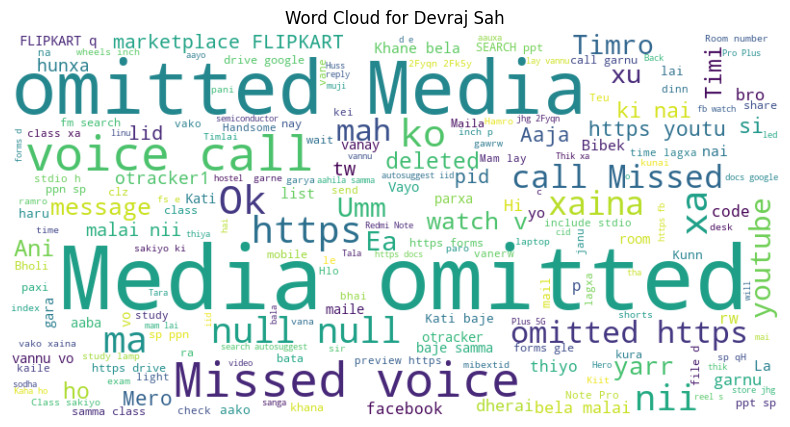

In [20]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load chat file
with open('chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Parse chat
data = []
for line in chat_data:
    match = re.match(r'(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[apmAPM]{2}) - (.+?): (.+)', line)
    if match:
        date, time, user, message = match.groups()
        data.append([date, time, user, message])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Time', 'User', 'Message'])

# Get unique users
unique_users = df['User'].unique()

# Display menu
print("\nChat Analysis Options:")
print("1. Word clouds for all users individually")
print("2. Common word cloud for all users")
for idx, user in enumerate(unique_users, 3):  # Start indexing from 3 for individual users
    print(f"{idx}. Word cloud for '{user}'")

# User choice
choice = int(input("\nEnter your choice: "))

# Option 1: Word clouds for all users individually
if choice == 1:
    print("\nGenerating word clouds for all users individually...")
    for user in unique_users:
        user_messages = " ".join(df[df['User'] == user]['Message'])
        if user_messages.strip():
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user_messages)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"Word Cloud for {user}")
            plt.show()
        else:
            print(f"No messages found for user '{user}'.")

# Option 2: Common word cloud for all users
elif choice == 2:
    print("\nGenerating common word cloud for all users...")
    common_messages = " ".join(df['Message'])
    if common_messages.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(common_messages)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title("Common Word Cloud for All Users")
        plt.show()
    else:
        print("No common messages found in the chat.")

# Option 3 onwards: Word cloud for a specific user
elif 3 <= choice < 3 + len(unique_users):
    selected_user = unique_users[choice - 3]
    print(f"\nGenerating word cloud for '{selected_user}'...")
    user_messages = " ".join(df[df['User'] == selected_user]['Message'])
    if user_messages.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user_messages)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for {selected_user}")
        plt.show()
    else:
        print(f"No messages found for user '{selected_user}'.")

# Invalid choice
else:
    print("Invalid choice. Exiting program.")


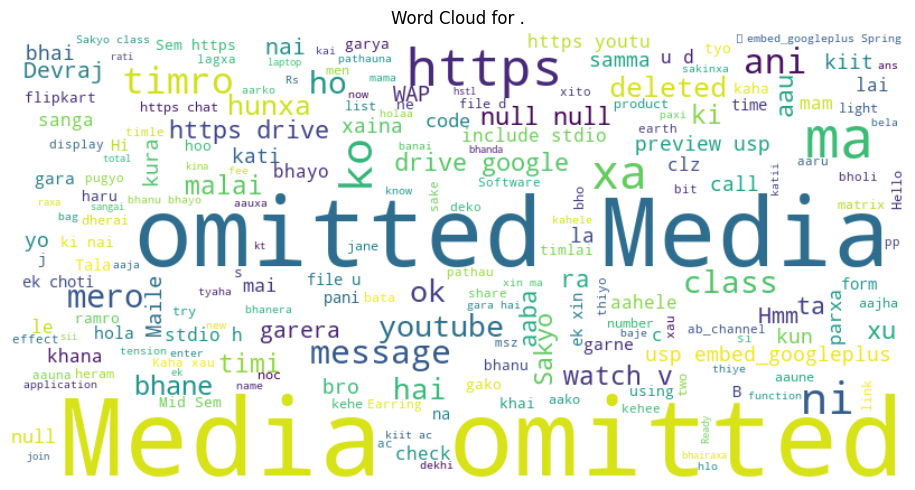

Word cloud saved as ._wordcloud.png


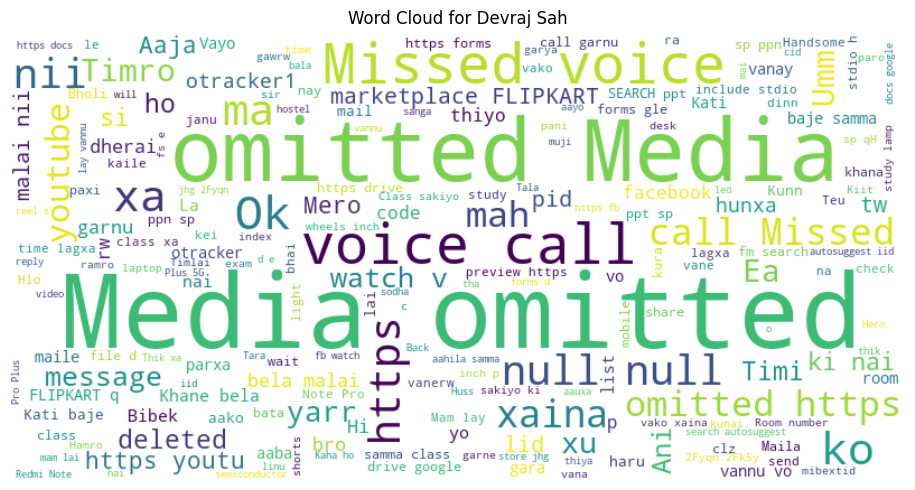

Word cloud saved as Devraj Sah_wordcloud.png


In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
def generate_and_save_wordcloud(user, messages):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(messages)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {user}")
    plt.tight_layout()
    plt.show()
    
    # Save the word cloud as an image file
    wordcloud.to_file(f"{user}_wordcloud.png")
    print(f"Word cloud saved as {user}_wordcloud.png")

# Example Usage
for user in df['User'].unique():
    user_messages = " ".join(df[df['User'] == user]['Message'])
    generate_and_save_wordcloud(user, user_messages)


In [26]:
# Function to filter messages by date
def filter_messages_by_date(start_date, end_date):
    # Convert inputs to datetime
    start_date = pd.to_datetime(start_date, format='%d/%m/%y')
    end_date = pd.to_datetime(end_date, format='%d/%m/%y')

    # Filter messages within the range
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    return filtered_df

# Example Usage
start_date = input("Enter start date (dd/mm/yy): ")
end_date = input("Enter end date (dd/mm/yy): ")
filtered_data = filter_messages_by_date(start_date, end_date)
print(f"Messages between {start_date} and {end_date}:")
print(filtered_data.head())


Messages between 20/02/23 and 25/03/23:
           Date      Time        User            Message  Hour
1340 2023-02-21   1:47 pm  Devraj Sah  Missed voice call    13
1341 2023-02-21   5:18 pm  Devraj Sah  Missed voice call    17
1342 2023-02-21   8:19 pm           .    <Media omitted>    20
1343 2023-02-23  10:23 am           .    <Media omitted>    10
1344 2023-02-23   4:05 pm           .    <Media omitted>    16


In [28]:
from collections import Counter
import emoji

# Calculate summary statistics
def chat_summary_statistics():
    stats = {}
    for user in df['User'].unique():
        user_data = df[df['User'] == user]
        
        # Total messages
        total_messages = len(user_data)
        
        # Most frequent words
        all_words = " ".join(user_data['Message']).split()
        most_common_words = Counter(all_words).most_common(5)
        
        # Most frequent emojis
        all_emojis = [char for message in user_data['Message'] for char in message if char in emoji.EMOJI_DATA]
        most_common_emojis = Counter(all_emojis).most_common(5)
        
        stats[user] = {
            "Total Messages": total_messages,
            "Most Common Words": most_common_words,
            "Most Common Emojis": most_common_emojis,
        }
    return stats

# Example Usage
statistics = chat_summary_statistics()
for user, stat in statistics.items():
    print(f"Statistics for {user}:")
    print(f"  Total Messages: {stat['Total Messages']}")
    print(f"  Most Common Words: {stat['Most Common Words']}")
    print(f"  Most Common Emojis: {stat['Most Common Emojis']}")


Statistics for .:
  Total Messages: 1619
  Most Common Words: [('<Media', 607), ('omitted>', 607), ('the', 71), ('ma', 68), ('xa', 51)]
  Most Common Emojis: [('😂', 27), ('😭', 3), ('🆗', 2), ('😒', 2), ('🧒', 2)]
Statistics for Devraj Sah:
  Total Messages: 1723
  Most Common Words: [('<Media', 446), ('omitted>', 446), ('call', 118), ('Missed', 96), ('voice', 93)]
  Most Common Emojis: [('😆', 72), ('😂', 21), ('🙉', 7), ('😃', 7), ('😀', 5)]


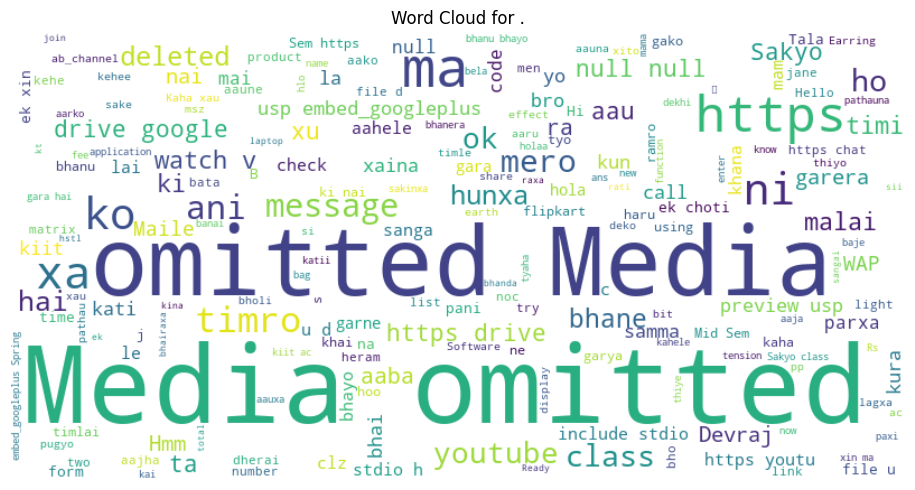

Word cloud saved as ._wordcloud.png


In [30]:
# Function to generate a word cloud for selected users
def multi_user_wordcloud(selected_users):
    filtered_messages = " ".join(df[df['User'].isin(selected_users)]['Message'])
    generate_and_save_wordcloud(" & ".join(selected_users), filtered_messages)

# Example Usage
selected_users = input("Enter user names separated by commas: ").split(',')
selected_users = [user.strip() for user in selected_users]  # Remove extra spaces
multi_user_wordcloud(selected_users)



WhatsApp Chat Analyzer
1. Filter Messages by Date
2. Generate and Save Word Clouds (Individual Users)
3. Generate and Save Common Word Cloud (Selected Users)
4. View Chat Timeline
5. View Summary Statistics
6. Exit


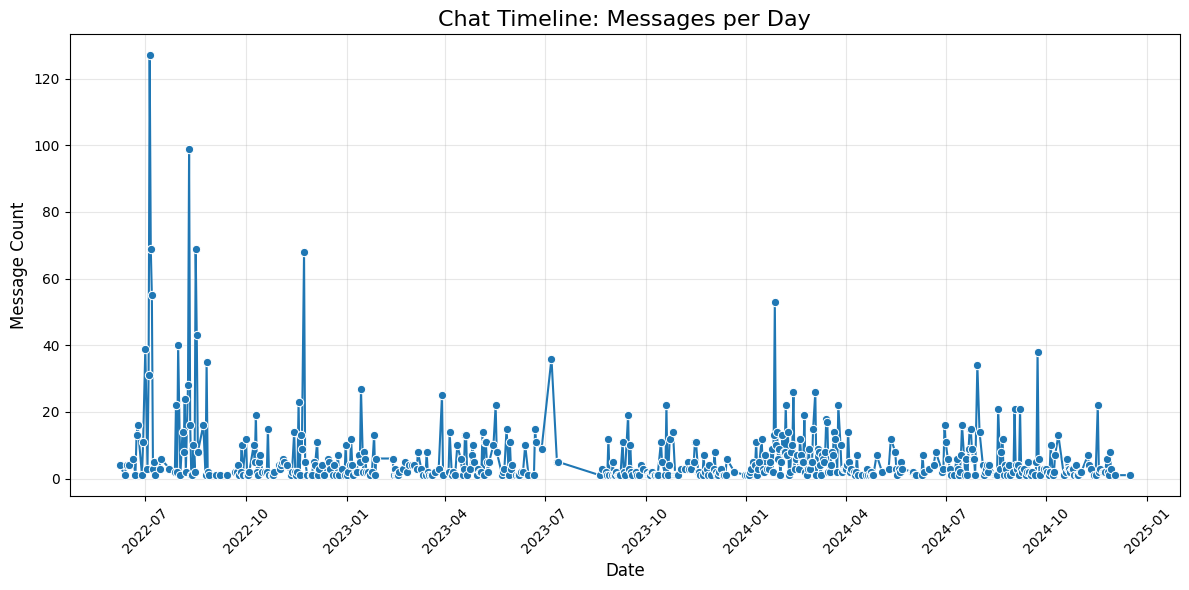


WhatsApp Chat Analyzer
1. Filter Messages by Date
2. Generate and Save Word Clouds (Individual Users)
3. Generate and Save Common Word Cloud (Selected Users)
4. View Chat Timeline
5. View Summary Statistics
6. Exit

Statistics for .:
  Total Messages: 1619
  Most Common Words: [('<Media', 607), ('omitted>', 607), ('the', 71), ('ma', 68), ('xa', 51)]
  Most Common Emojis: [('😂', 27), ('😭', 3), ('🆗', 2), ('😒', 2), ('🧒', 2)]

Statistics for Devraj Sah:
  Total Messages: 1723
  Most Common Words: [('<Media', 446), ('omitted>', 446), ('call', 118), ('Missed', 96), ('voice', 93)]
  Most Common Emojis: [('😆', 72), ('😂', 21), ('🙉', 7), ('😃', 7), ('😀', 5)]

WhatsApp Chat Analyzer
1. Filter Messages by Date
2. Generate and Save Word Clouds (Individual Users)
3. Generate and Save Common Word Cloud (Selected Users)
4. View Chat Timeline
5. View Summary Statistics
6. Exit
Exiting...


In [31]:
def main_menu():
    while True:
        print("\nWhatsApp Chat Analyzer")
        print("1. Filter Messages by Date")
        print("2. Generate and Save Word Clouds (Individual Users)")
        print("3. Generate and Save Common Word Cloud (Selected Users)")
        print("4. View Chat Timeline")
        print("5. View Summary Statistics")
        print("6. Exit")
        
        choice = input("Enter your choice: ")
        
        if choice == '1':
            start_date = input("Enter start date (dd/mm/yy): ")
            end_date = input("Enter end date (dd/mm/yy): ")
            filtered_data = filter_messages_by_date(start_date, end_date)
            print(f"Messages between {start_date} and {end_date}:")
            print(filtered_data.head())
        elif choice == '2':
            for user in df['User'].unique():
                user_messages = " ".join(df[df['User'] == user]['Message'])
                generate_and_save_wordcloud(user, user_messages)
        elif choice == '3':
            selected_users = input("Enter user names separated by commas: ").split(',')
            selected_users = [user.strip() for user in selected_users]
            multi_user_wordcloud(selected_users)
        elif choice == '4':
            # Chat timeline implementation
            plt.figure(figsize=(12, 6))
            sns.lineplot(data=messages_per_day, x='Date', y='Message Count', marker='o')
            plt.title("Chat Timeline: Messages per Day", fontsize=16)
            plt.xlabel("Date", fontsize=12)
            plt.ylabel("Message Count", fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
        elif choice == '5':
            statistics = chat_summary_statistics()
            for user, stat in statistics.items():
                print(f"\nStatistics for {user}:")
                print(f"  Total Messages: {stat['Total Messages']}")
                print(f"  Most Common Words: {stat['Most Common Words']}")
                print(f"  Most Common Emojis: {stat['Most Common Emojis']}")
        elif choice == '6':
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the menu
main_menu()


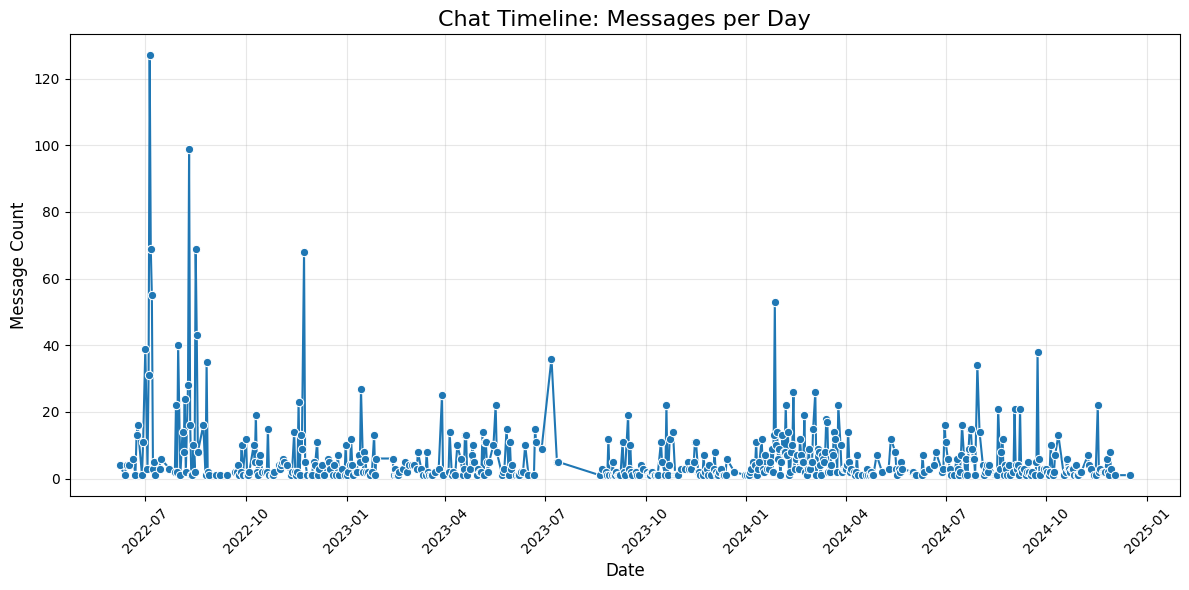

In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load chat file
with open('chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Parse chat
data = []
for line in chat_data:
    match = re.match(r'(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[apmAPM]{2}) - (.+?): (.+)', line)
    if match:
        date, time, user, message = match.groups()
        data.append([date, time, user, message])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Time', 'User', 'Message'])

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Group messages by date
messages_per_day = df.groupby('Date').size().reset_index(name='Message Count')

# Plot Chat Timeline
plt.figure(figsize=(12, 6))
sns.lineplot(data=messages_per_day, x='Date', y='Message Count', marker='o')
plt.title("Chat Timeline: Messages per Day", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Message Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


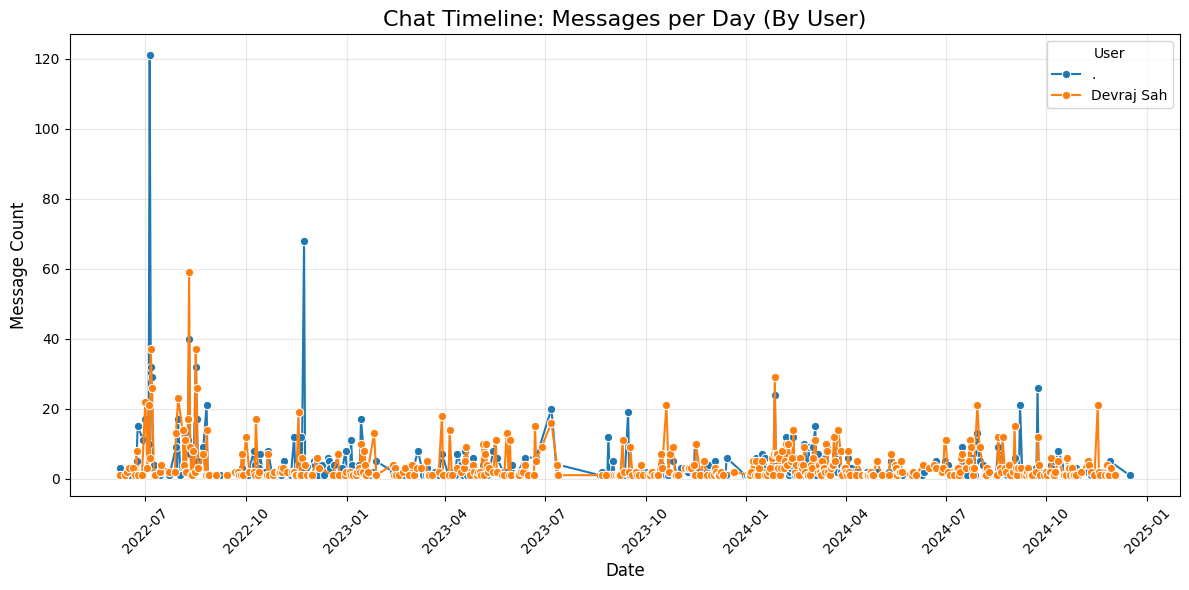

In [22]:
# Group messages by date and user
messages_per_user = df.groupby(['Date', 'User']).size().reset_index(name='Message Count')

# Plot Chat Timeline per User
plt.figure(figsize=(12, 6))
sns.lineplot(data=messages_per_user, x='Date', y='Message Count', hue='User', marker='o')
plt.title("Chat Timeline: Messages per Day (By User)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Message Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="User")
plt.tight_layout()
plt.show()


C:\Users\bibek\AppData\Local\Temp\ipykernel_17128\1197636188.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




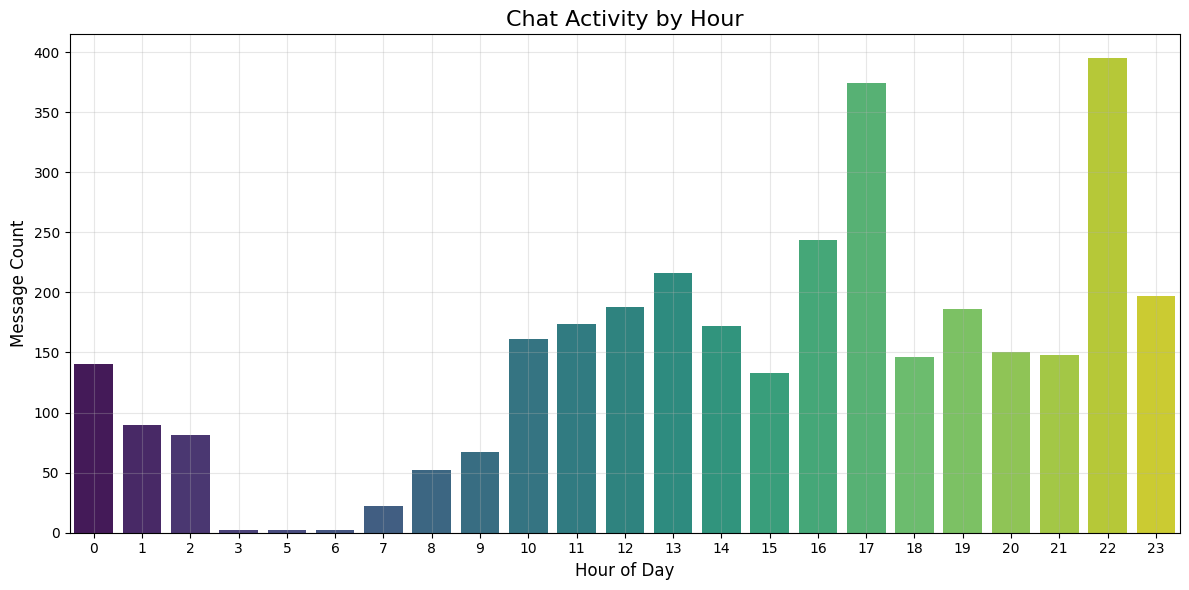

In [37]:
# Extract hour from Time column
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.hour

# Group messages by hour
messages_per_hour = df.groupby('Hour').size().reset_index(name='Message Count')

# Plot Chat Activity by Hour
plt.figure(figsize=(12, 6))
sns.barplot(data=messages_per_hour, x='Hour', y='Message Count', palette='viridis')
plt.title("Chat Activity by Hour", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Message Count", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [38]:
import plotly.express as px

# Interactive Timeline
fig = px.line(messages_per_day, x='Date', y='Message Count', title='Interactive Chat Timeline',
              labels={'Date': 'Date', 'Message Count': 'Number of Messages'})
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [34]:
import plotly.express as px
import plotly.io as pio

# Interactive Timeline
fig = px.line(messages_per_day, x='Date', y='Message Count', title='Interactive Chat Timeline',
              labels={'Date': 'Date', 'Message Count': 'Number of Messages'})

# Save to HTML and open in a browser
pio.write_html(fig, file='chat_timeline.html', auto_open=True)


In [39]:
# Save Filtered Messages as CSV/Text
def save_filtered_messages(filtered_data, file_format='csv'):
    if file_format == 'csv':
        file_name = 'filtered_messages.csv'
        filtered_data.to_csv(file_name, index=False)
    elif file_format == 'txt':
        file_name = 'filtered_messages.txt'
        with open(file_name, 'w', encoding='utf-8') as f:
            for _, row in filtered_data.iterrows():
                f.write(f"{row['Date']} - {row['User']}: {row['Message']}\n")
    print(f"Filtered messages saved as {file_name}")

# Example Usage
file_format = input("Enter file format to save (csv/txt): ").strip().lower()
save_filtered_messages(filtered_data, file_format)


Filtered messages saved as filtered_messages.txt


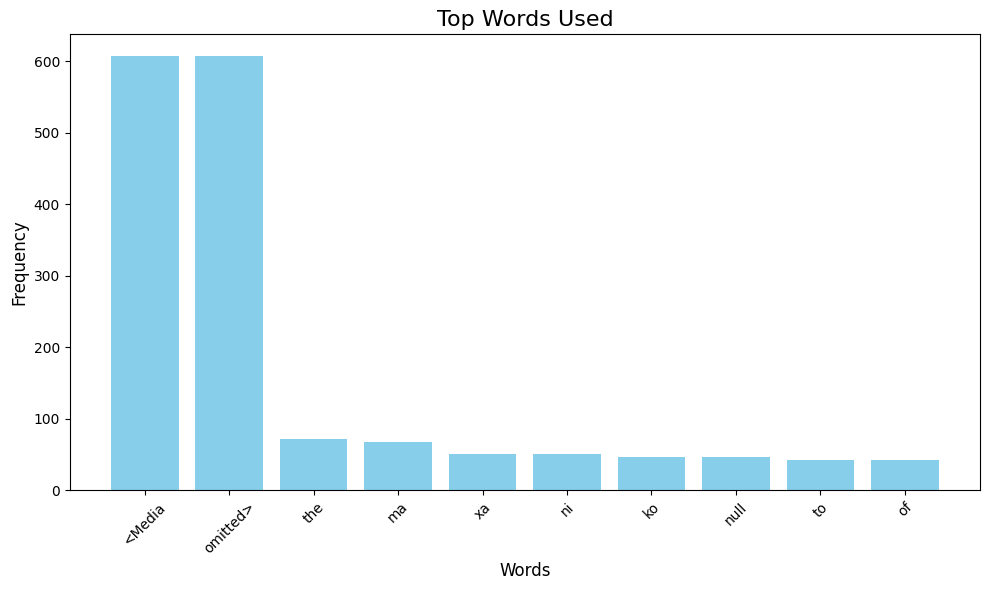

In [ ]:
# Emoji and Word Frequency Visualization
from collections import Counter
import matplotlib.pyplot as plt

def plot_word_frequencies(user_messages, top_n=10):
    all_words = " ".join(user_messages).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(top_n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top Words Used", fontsize=16)
    plt.xlabel("Words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example Usage
user_messages = df[df['User'] == 'Your Friend']['Message']
plot_word_frequencies(user_messages)


c:\Users\bibek\OneDrive\Desktop\program exercise\Python\chatanalyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127383 (\N{SQUARED OK}) missing from font(s) DejaVu Sans.

c:\Users\bibek\OneDrive\Desktop\program exercise\Python\chatanalyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129490 (\N{CHILD}) missing from font(s) DejaVu Sans.

c:\Users\bibek\OneDrive\Desktop\program exercise\Python\chatanalyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128706 (\N{PASSPORT CONTROL}) missing from font(s) DejaVu Sans.

c:\Users\bibek\OneDrive\Desktop\program exercise\Python\chatanalyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127747 (\N{NIGHT WITH STARS}) missing from font(s) DejaVu Sans.

c:\Users\bibek\OneDrive\Desktop\program exercise\Python\chatanalyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128090 (\N{WOMANS CLOTHES}) miss

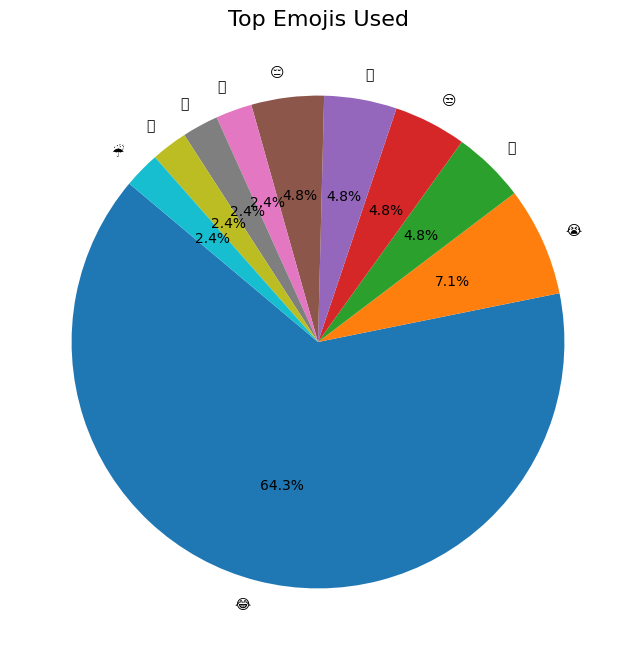

In [42]:
# Emoji Frequency Pie Chart
def plot_emoji_frequencies(user_messages):
    all_emojis = [char for message in user_messages for char in message if char in emoji.EMOJI_DATA]
    emoji_counts = Counter(all_emojis)
    emojis, counts = zip(*emoji_counts.most_common(10))

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=emojis, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
    plt.title("Top Emojis Used", fontsize=16)
    plt.show()

# Example Usage
plot_emoji_frequencies(user_messages)


In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

st.title("WhatsApp Chat Analyzer")

# Upload chat file
uploaded_file = st.file_uploader("Upload your chat file", type="txt")
if uploaded_file:
    # Parse chat data
    chat_data = uploaded_file.read().decode('utf-8')
    df = preprocess_chat_data(chat_data)  # Use the preprocess function from earlier

    st.sidebar.title("Options")
    option = st.sidebar.selectbox("Select an Analysis Option", ["Timeline", "Word Cloud", "Word Frequency", "Emoji Frequency"])

    if option == "Timeline":
        # Show timeline chart
        messages_per_day = df.groupby('Date').size().reset_index(name='Message Count')
        fig = px.line(messages_per_day, x='Date', y='Message Count', title='Chat Timeline',
                      labels={'Date': 'Date', 'Message Count': 'Number of Messages'})
        st.plotly_chart(fig)

    elif option == "Word Cloud":
        user = st.sidebar.selectbox("Select User", df['User'].unique())
        user_messages = " ".join(df[df['User'] == user]['Message'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user_messages)
        st.image(wordcloud.to_array(), caption=f"Word Cloud for {user}")

    elif option == "Word Frequency":
        user = st.sidebar.selectbox("Select User", df['User'].unique())
        user_messages = " ".join(df[df['User'] == user]['Message'])
        all_words = user_messages.split()
        word_counts = Counter(all_words).most_common(10)
        words, counts = zip(*word_counts)

        st.bar_chart(pd.DataFrame({'Words': words, 'Counts': counts}))

    elif option == "Emoji Frequency":
        user = st.sidebar.selectbox("Select User", df['User'].unique())
        user_messages = " ".join(df[df['User'] == user]['Message'])
        all_emojis = [char for message in user_messages for char in message if char in emoji.EMOJI_DATA]
        emoji_counts = Counter(all_emojis).most_common(10)
        emojis, counts = zip(*emoji_counts)

        st.write("Top Emojis")
        st.write(pd.DataFrame({'Emoji': emojis, 'Count': counts}))

        fig = px.pie(names=emojis, values=counts, title='Emoji Frequency')
        st.plotly_chart(fig)
